In [ ]:
import pandas as pd

In [ ]:
top_data_df=pd.read_csv('https://raw.githubusercontent.com/mayank100sharma/Sentiment-Analysis-on-Yelp-Reviews/master/yelp.csv')

In [ ]:
top_data_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
top_data_df.shape

(10000, 11)

Number of rows per star rating:
4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64


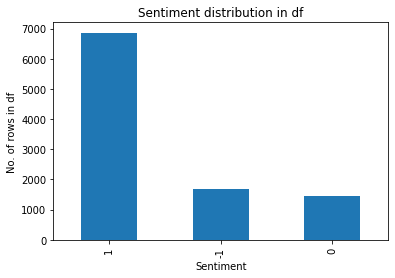

In [ ]:
import matplotlib.pyplot as plt 

print("Number of rows per star rating:")
print(top_data_df['stars'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1
# Mapping stars to sentiment into three categories
top_data_df['sentiment'] = [ map_sentiment(x) for x in top_data_df['stars']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(top_data_df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [ ]:
# Function to retrieve top few number of each category
def get_top_data(top_n = 5000):
    top_data_df_positive = top_data_df[top_data_df['sentiment'] == 1].head(top_n)
    top_data_df_negative = top_data_df[top_data_df['sentiment'] == -1].head(top_n)
    top_data_df_neutral = top_data_df[top_data_df['sentiment'] == 0].head(top_n)
    top_data_df_small = pd.concat([top_data_df_positive, top_data_df_negative, top_data_df_neutral])
    return top_data_df_small

# Function call to get the top 10000 from each sentiment
top_data_df_small = get_top_data(top_n=10000)

# After selecting top few samples of each sentiment
print("After segregating and taking equal number of rows for each sentiment:")
print(top_data_df_small['sentiment'].value_counts())
top_data_df_small.head(10)

After segregating and taking equal number of rows for each sentiment:
 1    6863
-1    1676
 0    1461
Name: sentiment, dtype: int64


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,1
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,1
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,1
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,1
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,1


In [ ]:
# Removing the stop words
from gensim.parsing.preprocessing import remove_stopwords
print(remove_stopwords("Restaurant had a really good service!!"))
print(remove_stopwords("I did not like the food!!"))
print(remove_stopwords("This product is not good!!"))

Restaurant good service!!
I like food!!
This product good!!


In [ ]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
top_data_df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in top_data_df_small['text']] 
print(top_data_df_small['tokenized_text'].head(10))

0    [my, wife, took, me, here, on, my, birthday, f...
1    [have, no, idea, why, some, people, give, bad,...
2    [love, the, gyro, plate, rice, is, so, good, a...
3    [rosie, dakota, and, love, chaparral, dog, par...
4    [general, manager, scott, petello, is, good, e...
5    [quiessence, is, simply, put, beautiful, full,...
6    [drop, what, you, re, doing, and, drive, here,...
7    [luckily, didn, have, to, travel, far, to, mak...
8    [definitely, come, for, happy, hour, prices, a...
9    [nobuo, shows, his, unique, talents, with, eve...
Name: tokenized_text, dtype: object


In [ ]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
top_data_df_small['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in top_data_df_small['tokenized_text'] ]
top_data_df_small['stemmed_tokens'].head(10)

0    [my, wife, took, me, here, on, my, birthdai, f...
1    [have, no, idea, why, some, peopl, give, bad, ...
2    [love, the, gyro, plate, rice, is, so, good, a...
3    [rosi, dakota, and, love, chaparr, dog, park, ...
4    [gener, manag, scott, petello, is, good, egg, ...
5    [quiessenc, is, simpli, put, beauti, full, win...
6    [drop, what, you, re, do, and, drive, here, af...
7    [luckili, didn, have, to, travel, far, to, mak...
8    [definit, come, for, happi, hour, price, ar, a...
9    [nobuo, show, hi, uniqu, talent, with, everyth...
Name: stemmed_tokens, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id', 'stemmed_tokens']], 
                                                        top_data_df_small['sentiment'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(top_data_df_small)


Value counts for Train sentiments
 1    4786
-1    1164
 0    1050
Name: sentiment, dtype: int64
Value counts for Test sentiments
 1    2077
-1     512
 0     411
Name: sentiment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index             business_id  cool        date  funny  \
0   3236  rDvz5jX65gpfONFu7er9Tw     0  2010-08-03      1   
1   1646  UI5ghIUeHYxzwSfaDVUXOA     0  2012-02-16      0   
2   2916  G1_uulnhkAUBsaMAlJFc_g     1  2010-11-09      0   
3   2781  QbqJEXdngh_9fwqVTI0CJQ     0  2010-04-22      0   
4   3390  MPziC5MO2QQiYVAMM3fdSw     0  2012-09-16      0   

                review_id  stars  \
0  3VY7iN1LIqFX_CsM4gHMTg      4   
1  NMXfzmoPJgDlbF1x7E5Ppw      4   
2  sj3YyLFa2tFbv3NvwLyvvA      2   
3  oUw363cdW8aSYQUG5vmPMw      4   
4  jyVAxH_cInITZQ_Xvb5Biw      5   

                                                text  useful  \
0  I am not a fan of american mexican food, good ...       0   
1  Had an opportunity

In [ ]:
from gensim.models import Word2Vec
import time
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

word2vec_model_file = '/content' + 'word2vec_' + str(size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(top_data_df_small['stemmed_tokens']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save(word2vec_model_file)

Time taken to train word2vec model: 79.63231825828552


In [ ]:
import numpy as np
# Load the model from the model file
sg_w2v_model = Word2Vec.load(word2vec_model_file)
# Unique ID of the word
print("Index of the word 'action':")
print(sg_w2v_model.wv.vocab["action"].index)
# Total number of the words 
print(len(sg_w2v_model.wv.vocab))
# Print the size of the word2vec vector for one word
print("Length of the vector generated for a word")
print(len(sg_w2v_model['action']))
# Get the mean for the vectors for an example review
print("Print the length after taking average of all word vectors in a sentence:")
print(np.mean([sg_w2v_model[token] for token in top_data_df_small['stemmed_tokens'][0]], axis=0))

Index of the word 'action':
2514
19608
Length of the vector generated for a word
1000
Print the length after taking average of all word vectors in a sentence:
[ 9.62503254e-02 -2.45867223e-02 -6.14624331e-03 -2.45178733e-02
 -6.58175051e-02  2.82741357e-02  2.77595986e-02  1.00504354e-01
  4.67965156e-02  1.54911295e-01  1.55160083e-02 -4.97648939e-02
 -7.92807117e-02  3.02027334e-02  2.71936543e-02 -1.06833249e-01
  1.25707816e-02  4.29399610e-02 -1.19248424e-02 -2.42131688e-02
  3.29094268e-02  1.82059892e-02  1.78666059e-02 -4.83052097e-02
 -8.26065466e-02  2.80950721e-02  1.42081678e-01  1.34838941e-02
  6.02041967e-02  1.06736228e-01  4.56243666e-04  1.00067571e-01
 -2.66121719e-02  4.21668515e-02  4.02658358e-02  6.15312941e-02
 -2.88200695e-02  2.21255664e-02  1.03142112e-02 -2.04878271e-01
  1.40882269e-01 -4.08798307e-02  5.28911017e-02  4.62117083e-02
  6.34466335e-02 -1.30973548e-01 -4.64785844e-02 -6.61201850e-02
 -1.91695504e-02  7.64028579e-02  3.62661108e-02  4.10130024e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
# Store the vectors for train data in following file
word2vec_filename = '/content/' + 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([sg_w2v_model[token] for token in row['stemmed_tokens']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import time
#Import the DecisionTreeeClassifier
from sklearn.tree import DecisionTreeClassifier
# Load from the filename
word2vec_df = pd.read_csv(word2vec_filename)
#Initialize the model
clf_decision_word2vec = DecisionTreeClassifier()

start_time = time.time()
# Fit the model
clf_decision_word2vec.fit(word2vec_df, Y_train['sentiment'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

Time taken to fit the model with word2vec vectors: 12.00191068649292


In [ ]:
from sklearn.metrics import classification_report
test_features_word2vec = []
for index, row in X_test.iterrows():
    model_vector = np.mean([sg_w2v_model[token] for token in row['stemmed_tokens']], axis=0)
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(1000)]))
test_predictions_word2vec = clf_decision_word2vec.predict(test_features_word2vec)
print(classification_report(Y_test['sentiment'],test_predictions_word2vec))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       512
           0       0.14      1.00      0.24       411
           1       0.00      0.00      0.00      2077

    accuracy                           0.14      3000
   macro avg       0.05      0.33      0.08      3000
weighted avg       0.02      0.14      0.03      3000



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

In [ ]:
# https://medium.com/swlh/sentiment-classification-using-word-embeddings-word2vec-aedf28fbb8ca